<a href="https://colab.research.google.com/github/mayanku1111/SFprojects/blob/main/W2Wediting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install -r /content/drive/MyDrive/weights2weights/requirements.txt

  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-ju3hlpjd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-ju3hlpjd
  Resolved https://github.com/huggingface/peft.git to commit f2b6d13f1dbc971c7653aa65e82822ea2d84bb38
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached 

In [2]:
%cd /content/drive/MyDrive/weights2weights
!pip install git+https://github.com/huggingface/accelerate

/content/drive/MyDrive/weights2weights
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-szs9zq9g
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-szs9zq9g
  Resolved https://github.com/huggingface/accelerate to commit 415eddf1bee77da9ae0b98b1900a342c6a5a235a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.33.0.dev0-py3-none-any.whl size=315195 sha256=1787980e883276f76c53cb28afc6c528b78849f8924522be5efc9f271a929cb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-9lje6vde/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.30.1
    Uninstalling accelerate-0.30.1:
      Successfully uninstalled accelerate-0.30.1


In [6]:
import os
%cd /content/

/content


In [9]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("", "..")))
import torch
import gc
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from lora_w2w import LoRAw2w
from utils import load_models, inference, save_model_w2w, save_model_for_diffusers
from editing import get_direction, edit_inference, debias
device = "cuda:0"

In [10]:
import os
os.getcwd()

'/content'

In [12]:
mean = torch.load("/content/drive/MyDrive/weights2weights/files/mean.pt").bfloat16().to(device)
std = torch.load("/content/drive/MyDrive/weights2weights/files/std.pt").bfloat16().to(device)
v = torch.load("/content/drive/MyDrive/weights2weights/files/V.pt").bfloat16().to(device)
proj = torch.load("/content/drive/MyDrive/weights2weights/files/proj_1000pc.pt").bfloat16().to(device)
pinverse = torch.load("/content/drive/MyDrive/weights2weights/files/pinverse_1000pc.pt").bfloat16().to(device)
df = torch.load("/content/drive/MyDrive/weights2weights/files/identity_df.pt")
weight_dimensions = torch.load("/content/drive/MyDrive/weights2weights/files/weight_dimensions.pt")

In [13]:
unet, vae, text_encoder, tokenizer, noise_scheduler = load_models(device)

model_index.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
%cd /content/drive/MyDrive/weights2weights
from sampling import sample_weights

/content/drive/MyDrive/weights2weights


In [21]:
# free up memory whenever we resample
if 'network' in globals():
    del network
    network = None
    gc.collect()
    torch.cuda.empty_cache()
    unet, _, _, _, _ = load_models(device)

network  = sample_weights(unet, proj, mean, std, v[:, :1000], device, factor = 1.00)

In [22]:
#inference parameters
prompt = "sks person"
negative_prompt = "low quality, blurry, unfinished, cartoon"
batch_size = 1
height = 512
width = 512
guidance_scale = 3.0
seed = 5
ddim_steps = 50
# random seed generator
generator = torch.Generator(device=device)

#run inference
image = inference(network, unet, vae, text_encoder, tokenizer, prompt, negative_prompt, guidance_scale, noise_scheduler, ddim_steps, seed, generator, device)

### display image
image = image.detach().cpu().float().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image.show()

100%|██████████| 51/51 [00:42<00:00,  1.19it/s]


In [23]:
save_model_w2w(network, path="/content/drive/MyDrive/weights2weights/sample1_w2w")

In [24]:
weights0 = torch.load("/content/drive/MyDrive/weights2weights/sample1_w2w/w2wmodel.pt").to(device)

In [25]:
# free up memory if reinitializing model
if 'network' in globals():
    del network
    network = None
    gc.collect()
    torch.cuda.empty_cache()
    unet, _, _, _, _ = load_models(device)
# initialize model
network = LoRAw2w(unet = unet,
                proj = weights0,
                mean = mean,
                std = std,
                v = v[:,:10000],
                rank=1,
                multiplier=1.0,
                alpha=27,
                train_method="xattn-strict",
                ).to(device, dtype=torch.bfloat16)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [27]:
image = Image.open("/content/drive/MyDrive/weights2weights/inversion/images/real_image/real/im/43883.png")
image.show()


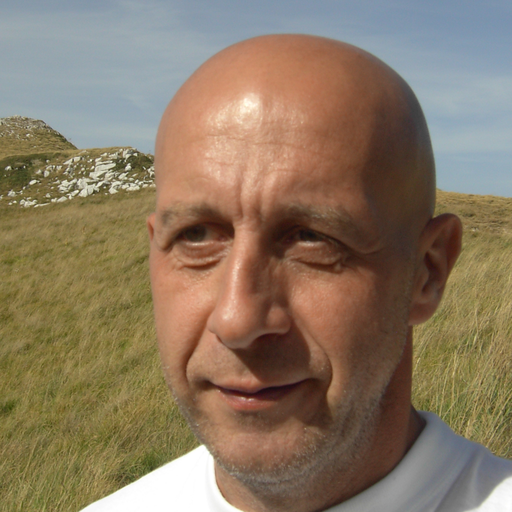

In [28]:
from IPython.display import HTML
from base64 import b64encode
from PIL import Image
import io


image = Image.open("/content/drive/MyDrive/weights2weights/inversion/images/real_image/real/im/43883.png")


buffered = io.BytesIO()
image.save(buffered, format="PNG")
img_str = b64encode(buffered.getvalue()).decode()


html = f'<img src="data:image/png;base64,{img_str}" alt="Image">'

display(HTML(html))

In [55]:
direction1 = get_direction(df = df,label = "Bald", pinverse = pinverse, return_dim = 10000, device =device)

In [56]:
direction1 = debias(direction1, "No_Beard", df, pinverse, device)

In [66]:
# weights1 = weights0-500000*direction1

In [59]:
direction1 = direction1[:, :1000]
weights1 = weights0 - 500000 * direction1

In [60]:
# free up memory if reinitializing model
if 'network' in globals():
    del network
    network = None
    gc.collect()
    torch.cuda.empty_cache()
    unet, _, _, _, _ = load_models(device)
# load in edited weights
network = LoRAw2w(unet = unet,
                proj = weights1,
                mean = mean,
                std = std,
                v = v[:,:10000],
                rank=1,
                multiplier=1.0,
                alpha=27,
                train_method="xattn-strict",
                ).to(device, dtype=torch.bfloat16)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [67]:
print("weights1 shape:", weights1.shape)
print("v[:,:10000] shape:", v[:,:10000].shape)

weights1 shape: torch.Size([1, 1000])
v[:,:10000] shape: torch.Size([99648, 10000])


In [69]:

prompt = "sks person"
negative_prompt = "low quality, blurry, unfinished, cartoon"
guidance_scale = 2.5
seed = 88
ddim_steps = 50


generator = torch.Generator(device=device)

image = inference(network, unet, vae, text_encoder, tokenizer, prompt, negative_prompt, guidance_scale, noise_scheduler, ddim_steps, seed, generator, device)
image = image.detach().cpu().float().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image.show()

In [70]:
weights1 = weights0-1000000*direction1

In [71]:

if 'network' in globals():
    del network
    network = None
    gc.collect()
    torch.cuda.empty_cache()
    unet, _, _, _, _ = load_models(device)


network = LoRAw2w(unet = unet,
                proj = weights0,
                mean = mean,
                std = std,
                v = v[:,:10000],
                rank=1,
                multiplier=1.0,
                alpha=27,
                train_method="xattn-strict",
                ).to(device, dtype=torch.bfloat16)

In [72]:

prompt = "sks person with Taylor swift"
negative_prompt = "low quality, blurry, unfinished, cartoon"
guidance_scale = 2.5
seed = 99
ddim_steps = 50

start_noise = 700

generator = torch.Generator(device=device)

images = []

for weight in [weights0, weights1]:
    image = edit_inference(network, weight, unet, vae, text_encoder, tokenizer, prompt, negative_prompt, guidance_scale, noise_scheduler, ddim_steps, start_noise, seed, generator, device)
    image = image.detach().cpu().float().permute(0, 2, 3, 1).numpy()[0]
    image = Image.fromarray((image * 255).round().astype("uint8"))
    images.append(image)


w, h = 512,512
grid = Image.new('RGB', size=(2*512, 1*512))
grid_w, grid_h = grid.size
for i, img in enumerate(images):
    grid.paste(img, box=(i%2*w, i//2*h))
grid